# <p style="padding:10px;background-color:#85BB65;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Assumptions Of Linear Regression</p>

While Building our Linear Regression Model we have some assumptions which we need to keep in our mind to better regression line fit for our Model.

Linear Regression is supervised machine Learning Algorithm in which one or more independent variable explain the dependent(Predictor) variable. There linear regression have five assumptions.


#### **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">assumptions of linear regression</mark>**


* 1- Linearity
* 2- Multicollinearity
* 3- mean of residuals
* 4- normality of residuals
* 5- Error Term should be independent to each other
* 6- hemoscedasticity / heteroscedasticity


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error ,r2_score ,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"Advertising.csv").set_index("Unnamed: 0")
df.head()

,TV,Radio,Newspaper,Sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
def two_plots_num_column(feature):

    print(f"the skewness value of {feature} column = {df[feature].skew():.2f}")
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.title('histgram')
    sns.histplot(data=df, x=feature, kde=True)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')

    plt.subplot(1,2,2)
    plt.title('Boxplot')
    sns.boxplot(y=df[feature])
    plt.show()


the skewness value of Newspaper column = 0.89


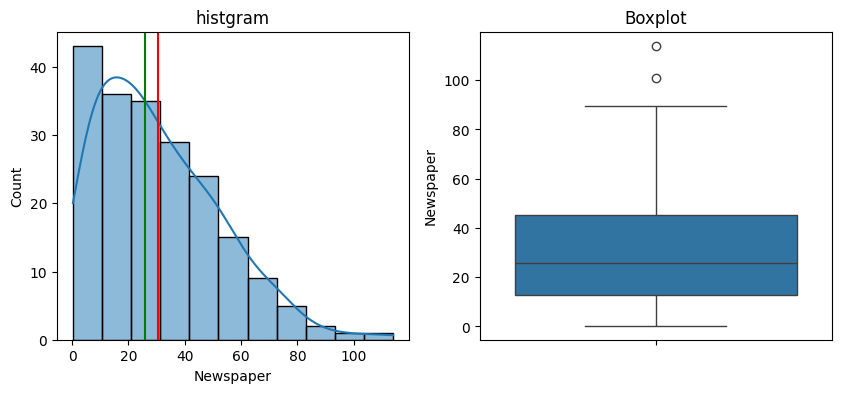

In [7]:
two_plots_num_column("Newspaper")

* `Newspaper`column is Right-skewed.

In [8]:
q1, q3 = df['Newspaper'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df.loc[(df["Newspaper"] < lower_bound) | (df["Newspaper"] > upper_bound), "Newspaper"] = np.nan
df["Newspaper"].fillna(df["Newspaper"].mean(), inplace=True)


the skewness value of Newspaper column = 0.65


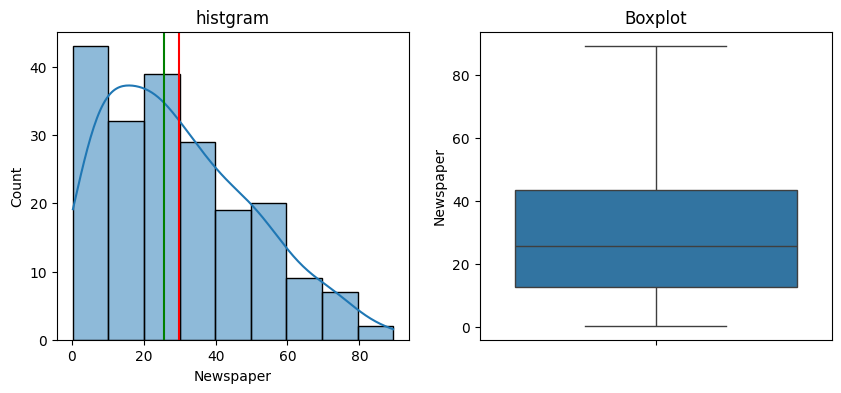

In [10]:
two_plots_num_column("Newspaper")

the skewness value of Sales column = 0.41


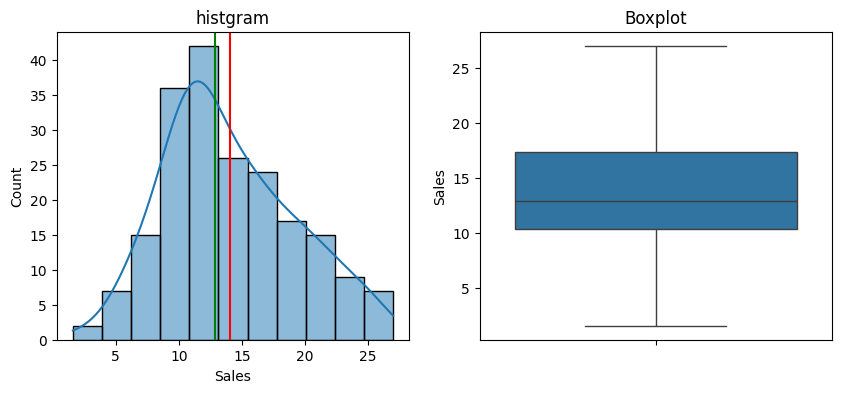

In [11]:
two_plots_num_column('Sales')

the skewness value of TV column = -0.07


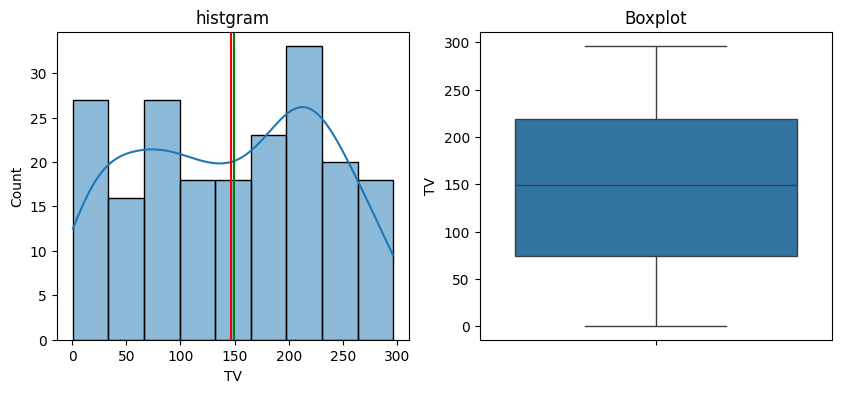

In [14]:
two_plots_num_column('TV')

# <b>I <span style='color:#85BB65'>|</span> Linearity</b>

<br>

#### **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">Note that</mark>**

* The relationship between X and the mean of Y is linear. If not linear, we may use polynomial regression or machine-learning techniques.

* Linear regression needs the relationship between the independent and dependent variables to be linear.

<br>

<div style="border-radius:10px;border:#85BB65 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
If the independent and dependent variable are not linearly dependent on each other and we still try to fit the straight line. it will not give the better accuracy in the model.
</div>

Let's use a pair plot to check the relation of independent variables with the Sales variable

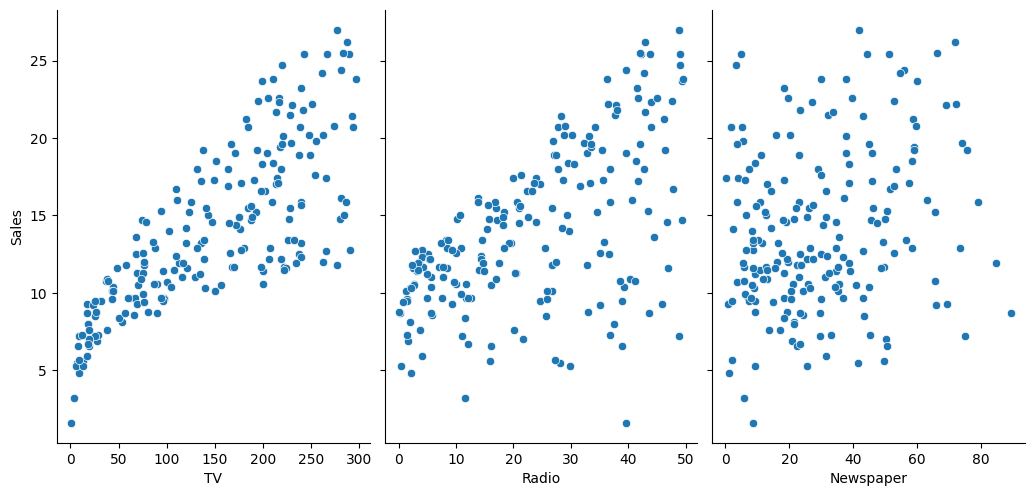

In [15]:
sns.pairplot(df, , y_vars='Sales', size=5, aspect=0.7);

### <b><span style='color:#85BB65'>|</span> Observations </b>


* `TV` feature sean to have linear relationship with sales.
* `Radio` feature doesn't form an accurately linear shape with the `Sales` variable but Radio do still better than `Newspaper` which seems to hardly have any specific shape.

So it shows that a linear regression fitting might not be the best model for it.

# <b>II <span style='color:#85BB65'>|</span> Multicollinearity</b>

It means that the independant variables should not have any correlation between each other.

To check this issue we can plot the pairwise correlation plot and avoid using high correlated variables

<Figure size 1000x1000 with 0 Axes>

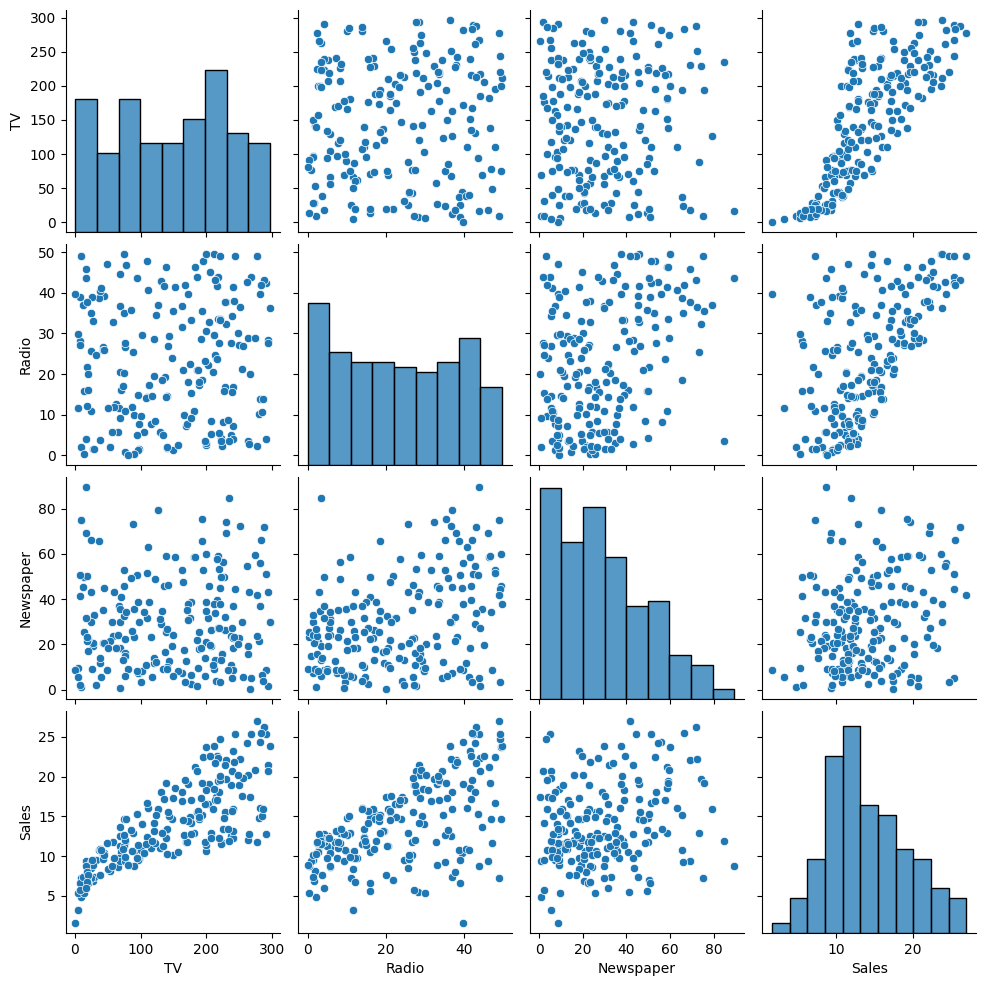

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show();

* Sometimes two or more variables are correlated to a independant variable which is hard to identify from correlation plot. in that case you can check the VIF (Variance Inflation Factor).

### **<span style='color:#85BB65'>What's the Variance Inflation Factor (VIF)? </span>**

VIF value ranges between 1 to infinity . value 1 indecation no multicollinearity and the higher value of VIF , the higher value of multicollinearity.

* VIF between 1:5 indecating moderate multicollinearity.
* VIF between 5:10 indecating higher level of multicollinearity.
* VIF between 10:.. indecating very high level multicollinearity.

In [16]:
# check about multicollenarity

from statsmodels.stats.outliers_influence import variance_inflation_factor

columns= df.drop(columns='Sales').columns
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.drop(columns='Sales').values, i)
                          for i in range(len(columns))]

vif_data

,feature,VIF
0,TV,2.511802
1,Radio,3.299805
2,Newspaper,3.137342


### <b><span style='color:#85BB65'>|</span> Observations </b>

* all feature have value of VIF Less than 5. that is very suitable

now let's build the model and check about other assumptions.

In [17]:
X = df.drop(["Sales"],axis=1)
y = df.Sales

In [18]:
# split data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42 ,test_size=0.25)

In [21]:
# build an fit the model

model = LinearRegression()
model.fit(X_train,y_train)

y_pred= model.predict(X_test)

In [27]:
X_test.iloc[0]


TV           163.3
Radio         31.6
Newspaper     52.9
Name: 96, dtype: float64

In [26]:
y_pred[0]

16.375892673095223

In [30]:
print("R squared: {}".format(r2_score(y_true=y_test ,y_pred=y_pred)))
print(f"mae : {mean_absolute_error(y_test,y_pred)}")

R squared: 0.8938670482743608
mae : 1.3960008378352127


# <b>III <span style='color:#85BB65'>|</span> Mean of residuals</b>

mean of residuals should be equal zero.

In [31]:
# create a list of residuals
residuals = y_test.values - y_pred

mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.12752825697780423


### <b><span style='color:#85BB65'>|</span> Observations </b>

* The mean of residuals is almost equal to zero. That's very good

# <b>IV <span style='color:#85BB65'>|</span> Normality of residuals</b>

it is assume that the error term is normally distributed

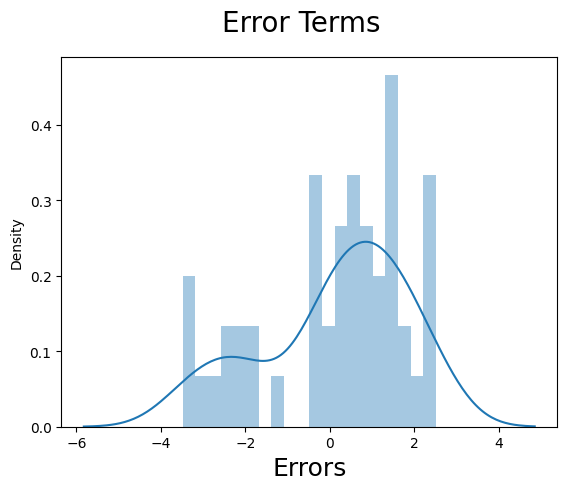

In [32]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot(residuals , bins=20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

### <b><span style='color:#85BB65'>|</span> Observations </b>

* Error terms is approximately lift-skew distributed. it means that a linear regression fitting didn't be the best.

# <b>V <span style='color:#85BB65'>|</span> Error Term should be independent to each other</b>

it means that the error term should not dependent in any other error terms.
The below diagram shows that the error term are randomly distributed and not following any pattern.

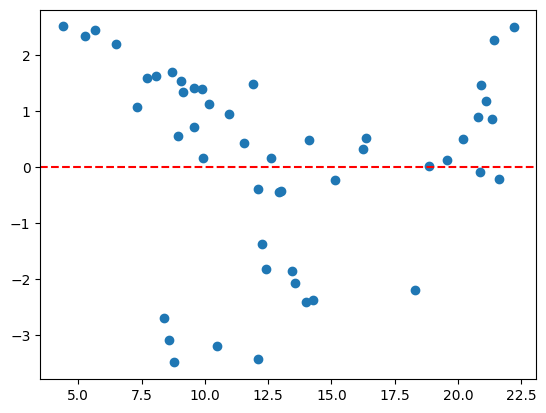

In [33]:
plt.scatter(y_pred , residuals)
plt.axhline(y=0,color="red" ,linestyle="--")
plt.show()

# <b>VI <span style='color:#85BB65'>|</span> Hemoscedasticity And Heteroscedasticity</b>

* hemoscedasticity means that variance should not be increasing or decreasing (constant) if error term changes (increase or decrease). Also it should not be following some pattern as error term changes (increase or decrease).

* Heteroskedasticity refers to the situation where the variance of the residuals in a regression model is not constant across different levels of the predictor variables.

![](https://media.geeksforgeeks.org/wp-content/uploads/20190425172205/hetero.jpg)

<br>

<div style="border-radius:10px;border:#85BB65 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
The null hypothesis of the test is that the variance of the residuals is constant (homoscedastic), while the alternative hypothesis is that the variance of the residuals is not constant (heteroskedastic).
</div>

<br>

to dentify heterscedasticity , we will use statistical test called `breusch-pagan`.
this test check whether heterscedasticity exists or not.


In [46]:
import statsmodels.api as sm
X = df.drop(["Sales"],axis=1)
y = df.Sales
X = sm.add_constant(X)

# Now you can perform your regression analysis
model = sm.OLS(y, X)
results = model.fit()

# Now you can perform the Breusch-Pagan test

from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(results.resid, X)

lm_statistic, lm_p_value, f_statistic, f_p_value = bp_test

print("Lagrange multiplier statistic:", lm_statistic)
print("p-value of LM statistic:", lm_p_value)
print("F-statistic:", f_statistic)
print("p-value of F-statistic:", f_p_value)

# Chosen significance level
alpha = 0.05

# Check if p-value is less than the significance level
if lm_p_value < alpha:
    print("There is evidence of heteroscedasticity.")
else:
    print("There is no evidence of heteroscedasticity.")

Lagrange multiplier statistic: 4.941059290723504
p-value of LM statistic: 0.17616430039318876
F-statistic: 1.6549657887342897
p-value of F-statistic: 0.17808937944840952
There is no evidence of heteroscedasticity.
